## Dealing with Imbalanced Datasets

### Imbalanced Dataset:
An imbalanced dataset occurs when one class (the minority class) is significantly underrepresented compared to another class (the majority class). In this case, we have a binary classification problem where Class 0 is the minority class and Class 1 is the majority class. This imbalance can lead to biased models that perform poorly in predicting the minority class.


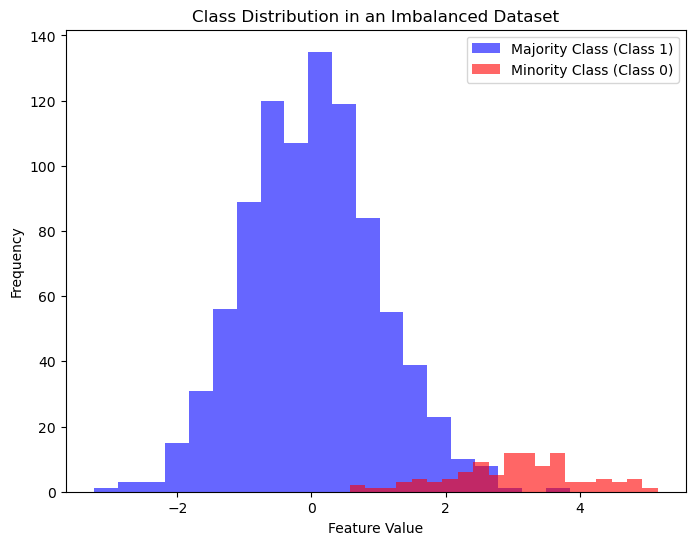

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data for a majority class (Class 1)
majority_class = np.random.normal(0, 1, 900)

# Generate data for a minority class (Class 0)
minority_class = np.random.normal(3, 1, 100)

# Combine the majority and minority class data
data = np.concatenate((majority_class, minority_class))

# Create labels for the classes
labels = np.concatenate((np.ones(900), np.zeros(100)))

# Plot the class distribution
plt.figure(figsize=(8, 6))
plt.hist(data[labels == 1], bins=20, color='blue', alpha=0.6, label='Majority Class (Class 1)')
plt.hist(data[labels == 0], bins=20, color='red', alpha=0.6, label='Minority Class (Class 0)')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.title('Class Distribution in an Imbalanced Dataset')
plt.legend()
plt.show()


Majority Class (Class 1). This class represents the majority of the data points. We generated 900 data points from a normal distribution with a mean of 0 and a standard deviation of 1. In a real-world scenario, this could represent something very common or typical.

Minority Class (Class 0). This class represents the minority of the data points. We generated 100 data points from a normal distribution with a mean of 3 and a standard deviation of 1. This class is intentionally made less common to simulate an imbalanced dataset. In practice, this could represent rare events or anomalies.

Another way to look at class imbalance is to directly look at the frequencies, without going through the distributions.

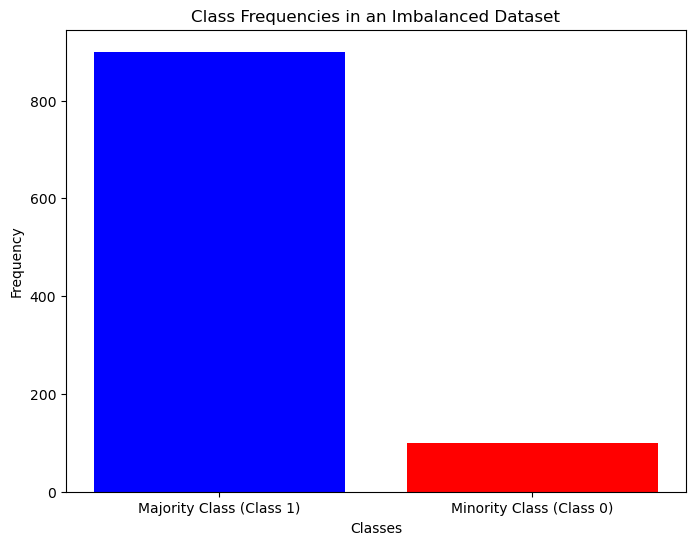

In [2]:
# Count the frequencies of each class
class_counts = [len(labels[labels == 1]), len(labels[labels == 0])]

# Plot the class frequencies using a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['Majority Class (Class 1)', 'Minority Class (Class 0)'], class_counts, color=['blue', 'red'])
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.title('Class Frequencies in an Imbalanced Dataset')
plt.show()

## How to deal with Imbalanced dataset

### 1. Classification Threshold:
The classification threshold determines the point at which predicted probabilities are converted into class labels. By default, the threshold is 0.5, meaning that if the predicted probability of belonging to Class 1 is greater than 0.5, the sample is classified as Class 1. Adjusting this threshold can impact the balance between precision and recall, especially in imbalanced datasets.

More reading: https://www.iguazio.com/glossary/classification-threshold/

### 2. Upsampling (or oversampling): 
Involves randomly duplicating samples from the minority class to balance the dataset.

### 3. Downsampling (or undersampling): 
Involves randomly removing samples from the majority class to balance the dataset.
This is typically achieved by randomly removing instances from the majority class until a more balanced representation of both classes is achieved.

Pros:

Reduced overfitting risk. Undersampling reduces the risk of overfitting compared to oversampling. By decreasing the number of instances in the majority class, the model is less likely to memorize the training data and can generalize better to new, unseen data.

Faster training time. With fewer instances in the dataset after undersampling, the training time for machine learning algorithms may be reduced. Smaller datasets generally result in faster training times.

Cons:

Loss of information. Undersampling involves discarding instances from the majority class, potentially leading to a loss of valuable information. This can be problematic if the discarded instances contain important characteristics that contribute to the overall understanding of the majority class.

Risk of biased model. Removing instances from the majority class may lead to a biased model, as it might not accurately capture the true distribution of the majority class. This bias can affect the model’s ability to generalize to real-world scenarios.

Potential Poor Performance on Majority Class. Undersampling may lead to a model that performs poorly on the majority class since it has less information to learn from. This can result in misclassification of the majority class instances.

Sensitivity to sampling rate. The degree of undersampling can significantly impact the model’s performance. If the sampling rate is too aggressive, important information from the majority class may be lost, and if it’s too conservative, class imbalance issues may persist.

### 4. Synthetic Data Generation: 
Techniques like Synthetic Minority Over-sampling Technique (SMOTE) generate synthetic samples for the minority class to balance the dataset.

**Upsampling and Synthetic**

Pros:

Improved model performance. Oversampling helps the model better learn the characteristics of the minority class, leading to improved classification performance, especially for the minority class.

Preserves information. Unlike undersampling, oversampling retains all instances from the majority class, ensuring that no information is lost during the process.

Cons:

Overfitting risk. Duplicating or generating synthetic instances can lead to overfitting if not controlled properly, especially if the synthetic data is too similar to the existing data.

Increased training time. A larger dataset due to oversampling may result in longer training times for machine learning algorithms.

### Common Evaluation Metrics That Are Affected by Imbalanced Data
To describe all the metrics that are affected by imbalanced data we first have to define the following:

True positive (TP). A correctly predicted value by a classifier indicating the presence of a condition or characteristic

True negative (TN). A correctly predicted value by a classifier indicating the absence of a condition or characteristic

False positive (FP). A wrongly predicted value by a classifier indicating that a particular condition or attribute is present when it’s not.

False negative (FN). A wrongly predicted value by a classifier indicates that a particular condition or attribute is not present when it is.

**Evaluation metrics affected by imbalanced data:**

- Accuracy: It measures the ratio of correctly predicted instances to the total instances in the dataset.Accuracy can be misleading when dealing with imbalanced data.In fact, suppose we have a dataset with 95% of instances belonging to Class A and only 5% to Class B. If a model predicts all instances as Class A, it would achieve an accuracy of 95%. However, this doesn’t necessarily mean the model is good; it’s just exploiting the class imbalance. This metric, in other words, doesn’t account for how well the model identifies the minority class (Class B).


- Precision: It measures the proportion of correctly predicted positive instances out of all predicted positive instances. In imbalanced datasets, precision can be highly misleading.In fact, if a model classifies only one instance as positive (Class B) and it’s correct, the precision would be 100%. However, this doesn’t indicate the model’s performance on the minority class because it may be missing many positive instances.


- Recall (or sensitivity): Recall, also known as sensitivity or true positive rate, measures the proportion of correctly predicted positive instances out of all actual positive instances. Recall can also be misleading in imbalanced datasets, especially when it’s crucial to capture all positive instances.If a model predicts only one instance as positive (Class B) when there are more positive instances, the recall may be very low, indicating that the model is missing a significant portion of the minority class. This happens because this metric doesn’t consider false positives.


- F1 score: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. As this metric is created using precision and recall, it can be affected by imbalanced data.If one class is heavily dominant (the majority class), and the model is biased towards it, the F1-score may still be relatively high due to high precision but low recall for the minority class. This could misrepresent the model’s overall effectiveness.

### Most Used Evaluation Metrics That Are Not Affected by Imbalanced Data

**Confusion matrix.**
A confusion matrix is a table that summarizes the performance of a classification algorithm. It provides a detailed breakdown of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). In particular, the primary diagonal (upper-left to lower-right) shows the TPs and TN. The secondary diagonal (lower-left to upper-right) shows us FP and FN. So, if an ML model is correctly classifying the data, the primary diagonal of the confusion matrix should report the highest values, while the secondary is the lowest.

So, the confusion matrix provides a detailed breakdown of model performance, making it easy to see how many instances are correctly or incorrectly classified for each class in a matter of seconds.



#### AUC and ROC:

AUC/ROC curve. ROC stands for “Receiver Operating Characteristic” and is a graphical way to evaluate a classifier by plotting the true positive rate (TPR) against the false positive rate (FPR) at different thresholds.
We define:

TPR as the sensitivity (which can also be called recall, as we said).

FPR as 1-specificity.

Specificity is the ability of a classifier to find all the negative samples:
It calculates the proportion of true negative predictions (correctly predicted negative instances) out of all instances predicted as negative. In simple terms, specificity answers the question: "Of all the instances predicted as negative, how many were actually negative?"

Mathematically, specificity is calculated as:
## Specifity = True Negatives/(True Negatives+False Positives)

Precision: Focuses on the accuracy of positive predictions, particularly relevant in scenarios where false positives are costly or undesirable (e.g., medical diagnoses).

Specificity: Focuses on the accuracy of negative predictions, particularly relevant when correctly identifying negative instances is critical (e.g., screening tests where false alarms can lead to unnecessary further tests or procedures).

**ROC**

The Receiver Operating Characteristic (ROC) curve is a graph that shows how well your model can distinguish between the two classes (spam and not spam) at different classification thresholds.

**X-axis (False Positive Rate):** This represents the proportion of actual negative cases that are incorrectly classified as positive. In our email example, it's the percentage of non-spam emails that are mistakenly classified as spam.

**Y-axis (True Positive Rate):** This represents the proportion of actual positive cases that are correctly classified as positive. In our email example, it's the percentage of spam emails that are correctly identified as spam.

**AUC**

The Area Under the Curve (AUC) measures the entire two-dimensional area underneath the ROC curve. It provides a single number that quantifies the overall performance of your model across all possible classification thresholds.

AUC = 0.5: This means your model performs no better than random guessing. The ROC curve hugs the diagonal line, indicating that the true positive rate is equal to the false positive rate.

AUC > 0.5: This indicates that your model performs better than random guessing. The ROC curve is above the diagonal line, meaning the model has a higher true positive rate than false positive rate.

AUC = 1: This indicates a perfect classifier. The ROC curve reaches the upper-left corner, meaning the model has a true positive rate of 1 (no false negatives) and a false positive rate of 0 (no false positives).

**VIDEO**: https://www.youtube.com/watch?v=kTRIXZcVTw4

Think of the ROC curve as a visual representation of how well your model can distinguish between the different classes. A good model will have a curve that bends towards the upper-left corner, indicating high true positive rates and low false positive rates across different thresholds. The AUC score summarizes this performance into a single number, with higher values indicating better model performance.

In essence, the ROC curve and AUC provide a way to evaluate and compare different models to see which one does the best job of separating the classes you're interested in.

Install the imbalanced-learn library. This library provides various techniques for handling imbalanced datasets, including oversampling, undersampling, and generating synthetic samples.

In [3]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define X and y 
X = data.reshape(-1, 1)  # Reshape data to have a single feature per sample
y = labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classifier
classifier = RandomForestClassifier(random_state=42)

# Train and evaluate on original imbalanced data
classifier.fit(X_train, y_train)
y_pred_imbalanced = classifier.predict(X_test)
auc_imbalanced = roc_auc_score(y_test, y_pred_imbalanced)
report_imbalanced = classification_report(y_test, y_pred_imbalanced)

# Upsampling (SMOTE)
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
classifier.fit(X_smote, y_smote)
y_pred_upsampled = classifier.predict(X_test)
auc_upsampled = roc_auc_score(y_test, y_pred_upsampled)
report_upsampled = classification_report(y_test, y_pred_upsampled)

# Downsampling
undersample = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersample.fit_resample(X_train, y_train)
classifier.fit(X_undersampled, y_undersampled)
y_pred_downsampled = classifier.predict(X_test)
auc_downsampled = roc_auc_score(y_test, y_pred_downsampled)
report_downsampled = classification_report(y_test, y_pred_downsampled)

# Synthetic Data Generation
X_synthetic, y_synthetic = SMOTE(random_state=42).fit_resample(X_train, y_train)
classifier.fit(X_synthetic, y_synthetic)
y_pred_synthetic = classifier.predict(X_test)
auc_synthetic = roc_auc_score(y_test, y_pred_synthetic)
report_synthetic = classification_report(y_test, y_pred_synthetic)

# Print reports
print("Classification Report - Imbalanced Data:")
print(report_imbalanced)
print("AUC - Imbalanced Data:", auc_imbalanced)
print("\nClassification Report - Upsampled Data:")
print(report_upsampled)
print("AUC - Upsampled Data:", auc_upsampled)
print("\nClassification Report - Downsampled Data:")
print(report_downsampled)
print("AUC - Downsampled Data:", auc_downsampled)
print("\nClassification Report - Synthetic Data:")
print(report_synthetic)
print("AUC - Synthetic Data:", auc_synthetic)


Classification Report - Imbalanced Data:
              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75        21
         1.0       0.97      0.98      0.97       179

    accuracy                           0.95       200
   macro avg       0.88      0.85      0.86       200
weighted avg       0.95      0.95      0.95       200

AUC - Imbalanced Data: 0.8459696727853153

Classification Report - Upsampled Data:
              precision    recall  f1-score   support

         0.0       0.63      0.81      0.71        21
         1.0       0.98      0.94      0.96       179

    accuracy                           0.93       200
   macro avg       0.80      0.88      0.83       200
weighted avg       0.94      0.93      0.93       200

AUC - Upsampled Data: 0.87682894386805

Classification Report - Downsampled Data:
              precision    recall  f1-score   support

         0.0       0.42      0.86      0.56        21
         1.0       0.98      0.

Counting the resampled data and compare with imbalanced data

In [5]:
# Count majority and minority classes for imbalanced data
majority_count_imbalanced = np.sum(y == 1)
minority_count_imbalanced = np.sum(y == 0)

# Count majority and minority classes for upsampled data
majority_count_upsampled = np.sum(y_smote == 1)
minority_count_upsampled = np.sum(y_smote == 0)

# Count majority and minority classes for downsampled data
majority_count_downsampled = np.sum(y_undersampled == 1)
minority_count_downsampled = np.sum(y_undersampled == 0)

# Count majority and minority classes for synthetic data
majority_count_synthetic = np.sum(y_synthetic == 1)
minority_count_synthetic = np.sum(y_synthetic == 0)

# Print counts
print("Imbalanced Data - Majority class count:", majority_count_imbalanced)
print("Imbalanced Data - Minority class count:", minority_count_imbalanced)
print("\nUpsampled Data - Majority class count:", majority_count_upsampled)
print("Upsampled Data - Minority class count:", minority_count_upsampled)
print("\nDownsampled Data - Majority class count:", majority_count_downsampled)
print("Downsampled Data - Minority class count:", minority_count_downsampled)
print("\nSynthetic Data - Majority class count:", majority_count_synthetic)
print("Synthetic Data - Minority class count:", minority_count_synthetic)


Imbalanced Data - Majority class count: 900
Imbalanced Data - Minority class count: 100

Upsampled Data - Majority class count: 721
Upsampled Data - Minority class count: 721

Downsampled Data - Majority class count: 79
Downsampled Data - Minority class count: 79

Synthetic Data - Majority class count: 721
Synthetic Data - Minority class count: 721


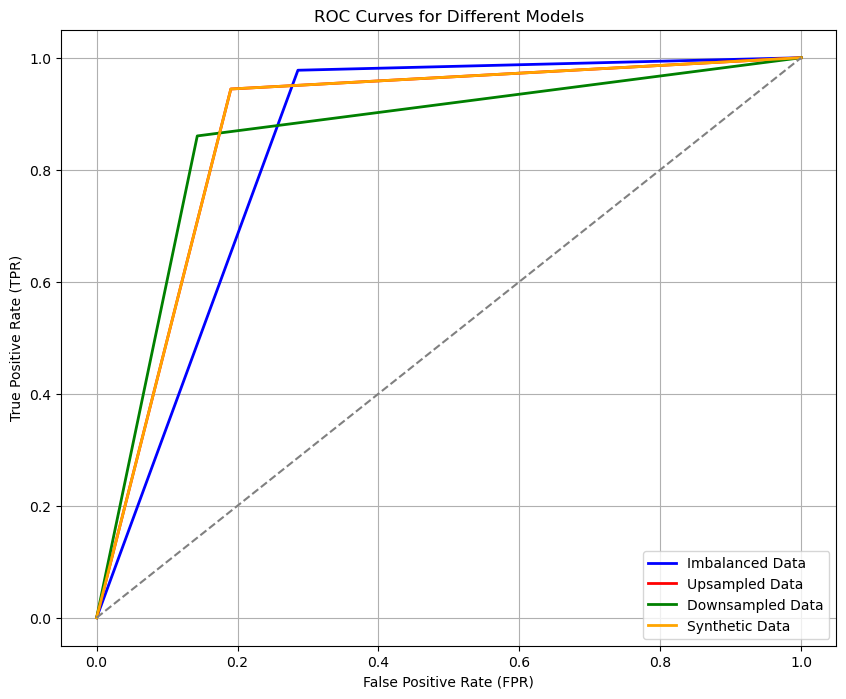

In [6]:
from sklearn.metrics import roc_curve

# Compute ROC curve for imbalanced data
fpr_imbalanced, tpr_imbalanced, _ = roc_curve(y_test, y_pred_imbalanced)

# Compute ROC curve for upsampled data
fpr_upsampled, tpr_upsampled, _ = roc_curve(y_test, y_pred_upsampled)

# Compute ROC curve for downsampled data
fpr_downsampled, tpr_downsampled, _ = roc_curve(y_test, y_pred_downsampled)

# Compute ROC curve for synthetic data
fpr_synthetic, tpr_synthetic, _ = roc_curve(y_test, y_pred_synthetic)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_imbalanced, tpr_imbalanced, color='blue', lw=2, label='Imbalanced Data')
plt.plot(fpr_upsampled, tpr_upsampled, color='red', lw=2, label='Upsampled Data')
plt.plot(fpr_downsampled, tpr_downsampled, color='green', lw=2, label='Downsampled Data')
plt.plot(fpr_synthetic, tpr_synthetic, color='orange', lw=2, label='Synthetic Data')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Different Models')
plt.legend()
plt.grid(True)
plt.show()


## Interpretation

### Imbalanced Data:
Precision (Class 0): 79% of the instances predicted as Class 0 are actually Class 0.

Recall (Class 0): 71% of the actual Class 0 instances are correctly predicted as Class 0.

Precision (Class 1): 97% of the instances predicted as Class 1 are actually Class 1.

Recall (Class 1): 98% of the actual Class 1 instances are correctly predicted as Class 1.

AUC: The Area Under the ROC Curve is 0.846, indicating decent discriminative ability between the classes.

### Upsampled Data:
Precision (Class 0): 63% of the instances predicted as Class 0 are actually Class 0.

Recall (Class 0): 81% of the actual Class 0 instances are correctly predicted as Class 0.

Precision (Class 1): 98% of the instances predicted as Class 1 are actually Class 1.

Recall (Class 1): 94% of the actual Class 1 instances are correctly predicted as Class 1.

AUC: The Area Under the ROC Curve is 0.877, indicating improved discriminative ability compared to the imbalanced data.

### Downsampled Data:
Precision (Class 0): 42% of the instances predicted as Class 0 are actually Class 0.

Recall (Class 0): 86% of the actual Class 0 instances are correctly predicted as Class 0.

Precision (Class 1): 98% of the instances predicted as Class 1 are actually Class 1.

Recall (Class 1): 86% of the actual Class 1 instances are correctly predicted as Class 1.

AUC: The Area Under the ROC Curve is 0.859, indicating reasonable discriminative ability, though slightly lower than the upsampled data.

### Synthetic Data:
Precision (Class 0): 63% of the instances predicted as Class 0 are actually Class 0.

Recall (Class 0): 81% of the actual Class 0 instances are correctly predicted as Class 0.

Precision (Class 1): 98% of the instances predicted as Class 1 are actually Class 1.

Recall (Class 1): 94% of the actual Class 1 instances are correctly predicted as Class 1.

AUC: The Area Under the ROC Curve is 0.877, same as the upsampled data, indicating similar discriminative ability.

**Overall:**
The precision, recall, and AUC metrics provide insights into the model's performance in terms of correctly identifying both classes.

Upsampling and generating synthetic data have shown improvements in the model's ability to distinguish between the classes compared to the imbalanced and downsampled data.




